In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import socket
from glob import glob

import oae_smyle
import config
import xarray as xr

this_notebook = 'run-cesm.ipynb'
assert 'cheyenne' in socket.gethostname(), (
    'this notebook must be run on cheyenne login node'
)


# Run CESM 
1. Change **project number** in config.py

In [3]:
%cd /glade/scratch/eyankovsky/oae-dor-global-efficiency/data/
%ls

/glade/scratch/eyankovsky/oae-dor-global-efficiency/data
Ensemble_NP_006/  Ensemble_NP_051/  North_Atlantic_basin_5year/
Ensemble_NP_022/  Ensemble_NP_185/  North_Pacific_basin_5year/


In [4]:
# forcing files
alk_forcing_spec = 'North_Pacific_basin'
#year_spec        = '5year'
# forcing_files = sorted(
#     glob(f'/glade/scratch/eyankovsky/oae-dor-global-efficiency/data/{alk_forcing_spec}_{year_spec}/alk-forcing-{alk_forcing_spec}.*.nc')
# )
forcing_files = sorted(
    glob(f'/glade/scratch/eyankovsky/oae-dor-global-efficiency/data/Ensemble_NP_006/alk-forcing-{alk_forcing_spec}.*.nc')
)
run_only_index_list = [i for i in range(len(forcing_files))]
    
len(forcing_files)

#forcing_files

16

In [5]:
ds = xr.open_dataset(forcing_files[15])

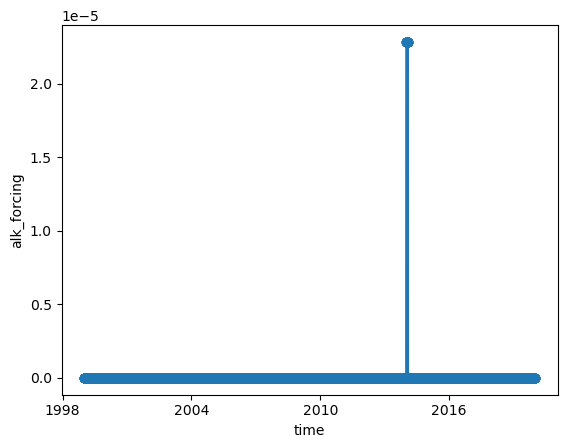

In [6]:
ds.alk_forcing.sum(['X', 'Y'])[0:].plot(marker='o')

In [7]:
clobber = True

# run_settings = dict(
#     stop_n=10,                #10 years
#     stop_option="nyear",
#     job_queue="economy",
#     wallclock="12:00:00",
#     resubmit=1,              #2 would give 30 years of output
# )

#run_only_index_list = [0, 16, 36, 63] # use this list to run only select indexes 
#run_only_index_list = [105, 155] # use this list to run only select indexes 
#run_only_index_list = [51, 64, 184, 185] # use this list to run only select indexes 

for n, f in enumerate(forcing_files):

    if n not in run_only_index_list:
        continue
    run_settings = dict(
#        refdate= "0" + str(n+347) + "-01" + "-01",  # change this
#        refdate= "0347" + "-01" + "-01",  # change this
        stop_n=10,
        stop_option="nyear",
        job_queue="regular",
        wallclock="12:00:00",
        resubmit=1, 
    )   #can put this outside of the for loop and get rid of refdate :/
    
    alk_forcing = os.path.basename(f).replace('.nc', '')

    case = f"smyle-fosi.{alk_forcing_spec}.{alk_forcing}"
    oae_smyle.create_clone(
        case, 
        alk_forcing_file=f, 
        submit=True, 
        clobber=clobber, 
        curtail_output=True,
        **run_settings
    )

 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble1999 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble1999/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble1999/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble1999/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble1999
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:02:54 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:16:15 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 21:16:16 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 21:16:16 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4486962.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4486960.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4486962.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2000 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2000/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2000/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2000/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2000
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:16:45 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:29:55 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 21:29:56 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 21:29:56 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4486988.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4486986.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4486988.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2001 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2001/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2001/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2001/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2001
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:30:31 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:42:00 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 21:42:00 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 21:42:00 ice 
   Cal

submit_jobs case.run
Submit job case.run


Submitted job id is 4487003.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487003.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive


Submit job case.st_archive


Submitted job id is 4487004.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487003.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487004.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2002 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2002/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2002/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2002/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2002
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:43:22 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:54:49 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 21:54:50 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 21:54:50 ice 
   Cal

submit_jobs case.run
Submit job case.run


Submitted job id is 4487018.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487018.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive


Submit job case.st_archive


Submitted job id is 4487020.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487018.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487020.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2003 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2003/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2003/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2003/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2003
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:55:22 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:07:26 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 22:07:26 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 22:07:26 ice 
   Cal

submit_jobs case.run
Submit job case.run


Submitted job id is 4487036.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487036.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive


Submit job case.st_archive


Submitted job id is 4487037.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487036.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487037.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2004 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2004/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2004/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2004/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2004
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:07:49 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:19:13 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 22:19:14 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 22:19:14 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487051.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487050.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487051.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2005 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2005/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2005/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2005/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2005
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:19:32 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:31:15 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 22:31:16 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 22:31:16 ice 
   Cal

submit_jobs case.run
Submit job case.run


Submitted job id is 4487062.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487062.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive


Submit job case.st_archive


Submitted job id is 4487063.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487062.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487063.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2006 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2006/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2006/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2006/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2006
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:35:34 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:47:26 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 22:47:26 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 22:47:26 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487078.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487077.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487078.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2007 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2007/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2007/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2007/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2007
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:47:48 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:59:24 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 22:59:24 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 22:59:24 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487090.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487089.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487090.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2008 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2008/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2008/env_mach_specific.xml already exists, delete to replace


Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2008/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2008
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 22:59:43 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:11:14 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 23:11:15 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 23:11:15 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487107.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487107.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive
Submitted job id is 4487108.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487107.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487108.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2009 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from inp

/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2009/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2009/env_mach_specific.xml already exists, delete to replace


If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2009/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2009
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:11:33 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:23:21 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 23:23:21 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 23:23:21 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487131.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487130.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487131.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2010 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machi

/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2010/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2010/env_mach_specific.xml already exists, delete to replace


If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2010/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2010
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:23:39 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:35:14 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 23:35:14 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 23:35:14 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487143.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487143.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive
Submitted job id is 4487144.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487143.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487144.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2011 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from inp

/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2011/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2011/env_mach_specific.xml already exists, delete to replace


If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2011/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2011
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:35:31 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:47:04 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 23:47:05 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 23:47:05 ice 
   Cal

submit_jobs case.run
Submit job case.run


Submitted job id is 4487155.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487155.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive


Submit job case.st_archive


Submitted job id is 4487156.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487155.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487156.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2012 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2012/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2012/env_mach_specific.xml already exists, delete to replace


Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2012/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2012
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:47:26 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:59:13 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 23:59:14 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 23:59:14 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487170.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487169.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487170.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2013 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2013/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2013/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2013/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2013
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 23:59:39 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-30 00:12:08 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-30 00:12:09 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-30 00:12:09 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4487184.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487184.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive
Submitted job id is 4487185.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487184.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487185.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2014 from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2014/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2014/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2014/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-ensemble2014
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-30 00:12:47 atm 
   Calling /glade/work/


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-30 00:24:39 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-30 00:24:40 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-30 00:24:40 ice 
   Cal

submit_jobs case.run
Submit job case.run


Submitted job id is 4487199.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4487199.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive


Submit job case.st_archive


Submitted job id is 4487200.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4487199.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4487200.chadmin1.ib0.cheyenne.ucar.edu


In [ ]:
#FG_CO2

In [ ]:
print('done')

In [101]:
######## run cesm
# clobber = True

# # use this list to run only select indexes 
# run_only_index_list = [forcing_id]  

# for n, f in enumerate(forcing_files):

#     if n not in run_only_index_list:
#         continue
#     print(n,f)

#     # string of the month: '01'
#     month_str = f[-5:-3]

#     run_settings = dict(
#         refdate="0347-" + month_str + "-01",  # change this
#         #refdate="0347-01-01",  # change this
#         stop_n=2,
#         stop_option="nyear",
#         job_queue="economy",
#         #job_queue="regular",
#         wallclock="01:00:00",
#         #wallclock="01:00:00",
#         resubmit=0, 
#     )

#     alk_forcing = os.path.basename(f).replace('.nc', '')
#     case = f"smyle-fosi.{alk_forcing_spec}.{alk_forcing}.test"

#     oae_smyle.create_clone(
#         case, 
#         alk_forcing_file=f, 
#         submit=False, 
#         clobber=clobber, 
#         curtail_output=True,
#         **run_settings
#     ) 

In [ ]:
print('done')


done


In [40]:
refdate

NameError: name 'refdate' is not defined